# Загрузка данных

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/14/bank_clients_transactions.csv')

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю camel_case

In [7]:
df = pd.DataFrame(df)

def to_camel_case(s):
    words = s.replace('_', ' ').replace('-', ' ').split()
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])
df.columns = [to_camel_case(col) for col in df.columns]

df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение типов данных

In [8]:
df= pd.DataFrame(df)
for column in ['transactiondate', 'customerdob']:
    if column in df.columns:
        df[column] = pd.to_datetime(df[column], format='%d/%m/%y', errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transactionid           1048567 non-null  object 
 1   customerid              1048567 non-null  object 
 2   customerdob             1045170 non-null  object 
 3   custgender              1047467 non-null  object 
 4   custlocation            1048416 non-null  object 
 5   custaccountbalance      1046198 non-null  float64
 6   transactiondate         1048567 non-null  object 
 7   transactiontime         1048567 non-null  int64  
 8   transactionamount(inr)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


# Поиск дублей и пропусков в данных

In [9]:
df = pd.DataFrame(df)


duplicates = df[df.duplicated()]
print("Дубликаты:")
print(duplicates)

missing_data = df.isna()
missing_count = df.isna().sum()
print("\nКоличество пропусков в каждом столбце:")
print(missing_count)

df_no_missing = df.dropna()
print("\nДанные без пропусков:")
print(df_no_missing)

df_no_duplicates = df.drop_duplicates()
print("\nДанные без дубликатов:")
print(df_no_duplicates)

Дубликаты:
Empty DataFrame
Columns: [transactionid, customerid, customerdob, custgender, custlocation, custaccountbalance, transactiondate, transactiontime, transactionamount(inr)]
Index: []

Количество пропусков в каждом столбце:
transactionid                 0
customerid                    0
customerdob               60736
custgender                 1100
custlocation                151
custaccountbalance         2369
transactiondate               0
transactiontime               0
transactionamount(inr)        0
dtype: int64

Данные без пропусков:
        transactionid customerid customerdob custgender   custlocation  \
0                  T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  1973-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
.

# Исследовательский анализ данных

In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [ ]:
unique_clients = df['customerid'].nunique()
print("Количество уникальных клиентов по идентификатору:", unique_clients)

Количество уникальных клиентов по идентификатору: 884265


In [ ]:
transaction_count = df.shape[0]
print("Количество транзакций:", transaction_count)

Количество транзакций: 1048567


In [ ]:
total_transactions = df.shape[0]
unique_clients = df['customerid'].nunique()
average_transactions_per_client = total_transactions / unique_clients
print("Среднее количество транзакций на одного клиента:", average_transactions_per_client)

Среднее количество транзакций на одного клиента: 1.1858062911005185


Статистики по CustAccountBalance:
count    1.046198e+06
mean     1.154035e+05
std      8.464854e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: custaccountbalance, dtype: float64

Статистики по TransactionAmount:


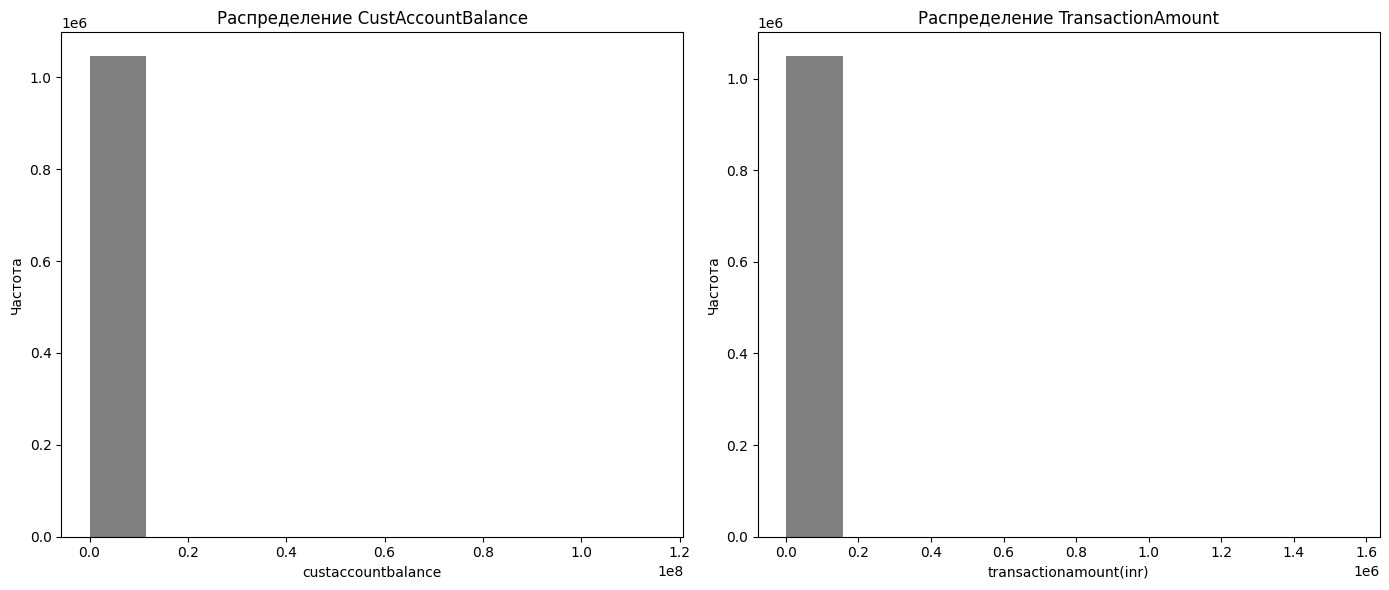

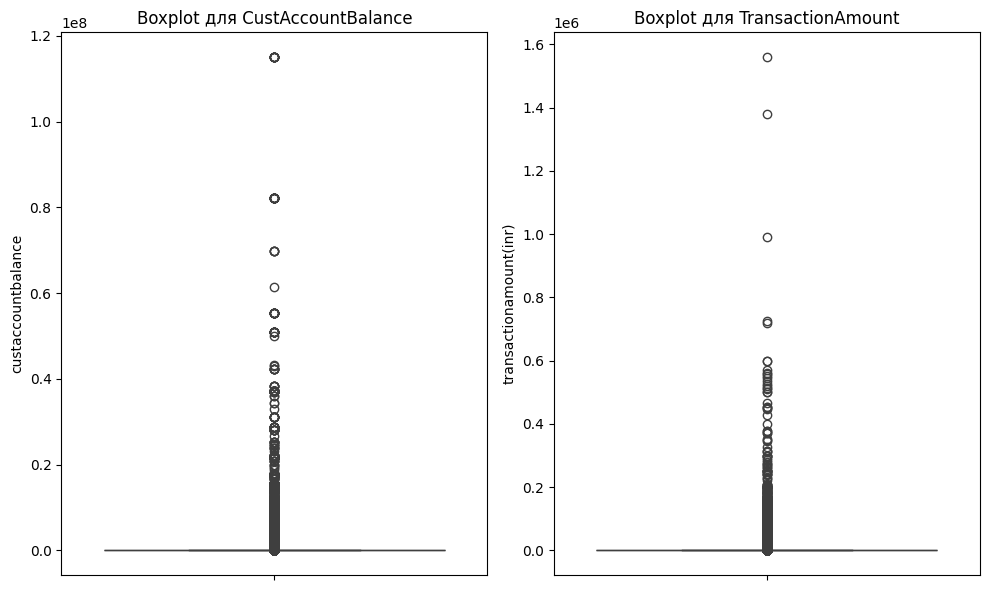

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Статистики по CustAccountBalance:")
print(df['custaccountbalance'].describe())
print("\nСтатистики по TransactionAmount:")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['custaccountbalance'], bins=10, color='grey')
plt.title('Распределение CustAccountBalance')
plt.xlabel('custaccountbalance')
plt.ylabel('Частота')




plt.subplot(1, 2, 2)
plt.hist(df['transactionamount(inr)'], bins=10, color='grey')
plt.title('Распределение TransactionAmount')
plt.xlabel('transactionamount(inr)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['custaccountbalance'])
plt.title('Boxplot для CustAccountBalance')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['transactionamount(inr)'])
plt.title('Boxplot для TransactionAmount')

plt.tight_layout()
plt.show()

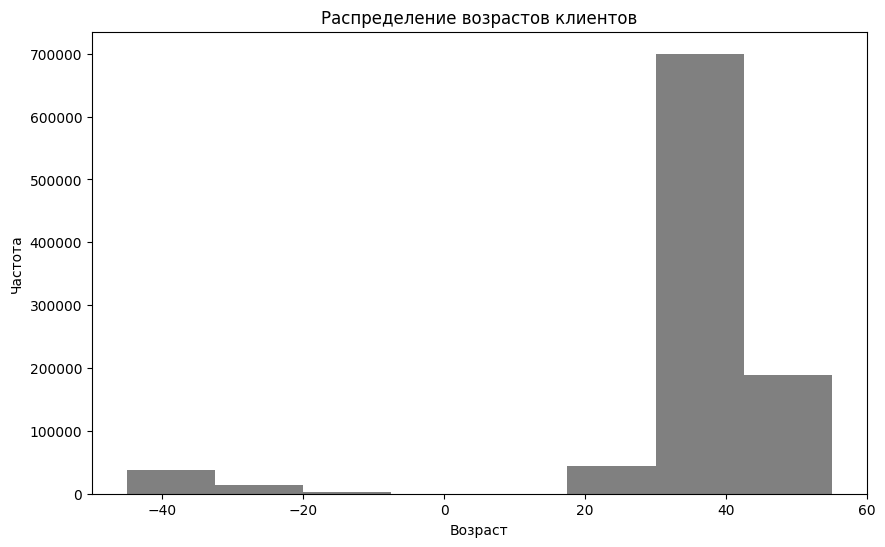

count    987831.000000
mean         33.485843
std          17.812992
min         -45.000000
25%          32.000000
50%          36.000000
75%          41.000000
max          55.000000
Name: age, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df)

current_date = pd.to_datetime('today')
df['age'] = (current_date - df['customerdob']).dt.days // 365

plt.figure(figsize=(10, 6))

plt.hist(df['age'], bins=8, color='grey')
plt.title('Распределение возрастов клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

print(df['age'].describe())

<ipython-input-24-4063ed6da184>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Greys')


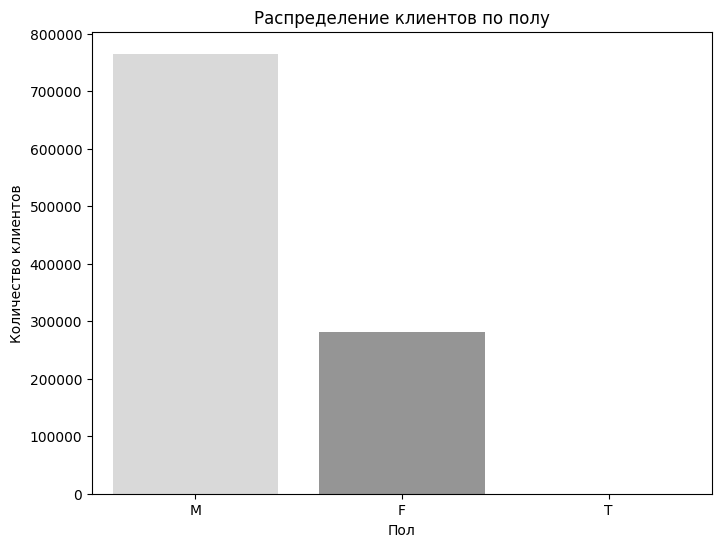

,count
custgender,
M,765530
F,281936
T,1


In [24]:

gender_counts = df['custgender'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Greys')
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()

gender_counts

<ipython-input-32-9c30d7e8c38e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_location_counts.index, y=top_location_counts.values, palette='Greys')


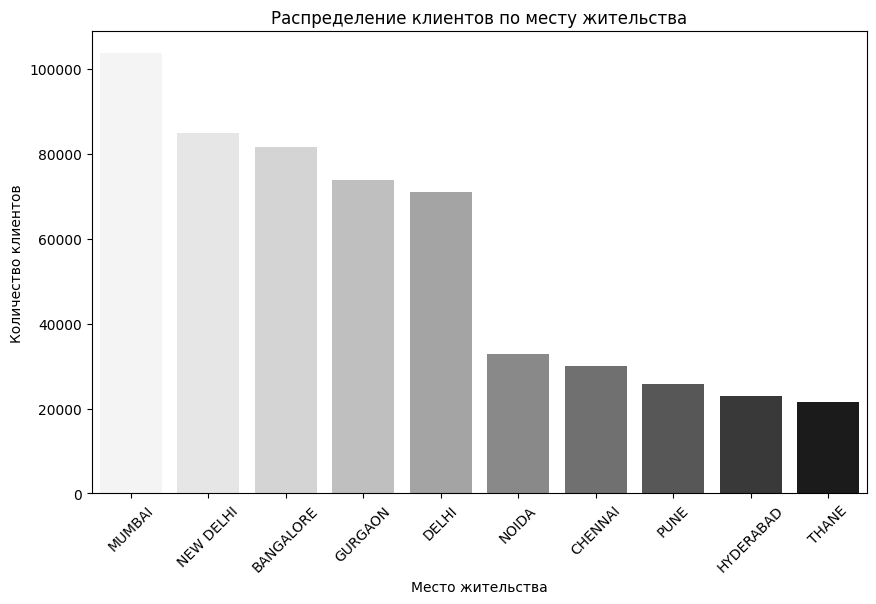

custlocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: count, Length: 9355, dtype: int64


In [32]:
location_counts = df['custlocation'].value_counts()

top_location_counts = location_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_location_counts.index, y=top_location_counts.values, palette='Greys')
plt.title('Распределение клиентов по месту жительства')
plt.xlabel('Место жительства')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()
print(location_counts)

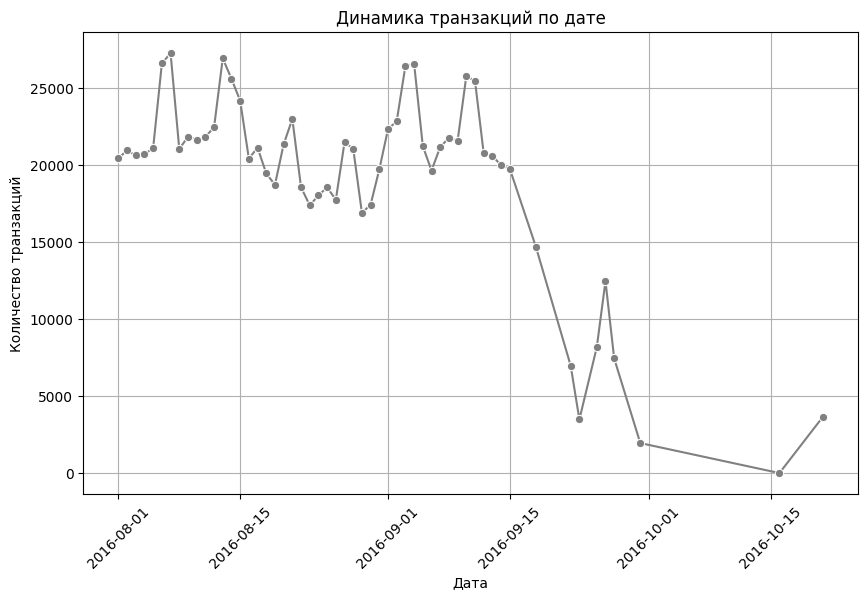

transactiondate
2016-08-01    20438
2016-08-02    20948
2016-08-03    20615
2016-08-04    20682
2016-08-05    21112
2016-08-06    26585
2016-08-07    27261
2016-08-08    21042
2016-08-09    21823
2016-08-10    21649
2016-08-11    21833
2016-08-12    22438
2016-08-13    26921
2016-08-14    25596
2016-08-15    24171
2016-08-16    20414
2016-08-17    21121
2016-08-18    19453
2016-08-19    18714
2016-08-20    21339
2016-08-21    22986
2016-08-22    18558
2016-08-23    17374
2016-08-24    18026
2016-08-25    18546
2016-08-26    17742
2016-08-27    21469
2016-08-28    21054
2016-08-29    16882
2016-08-30    17430
2016-08-31    19711
2016-09-01    22327
2016-09-02    22839
2016-09-03    26431
2016-09-04    26564
2016-09-05    21221
2016-09-06    19640
2016-09-07    21161
2016-09-08    21765
2016-09-09    21568
2016-09-10    25761
2016-09-11    25454
2016-09-12    20753
2016-09-13    20601
2016-09-14    19969
2016-09-15    19754
2016-09-18    14689
2016-09-22     6971
2016-09-23     3485
2016

In [28]:
transaction_counts = df.groupby('transactiondate')['transactionid'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index, y=transaction_counts.values, marker='o',color='grey')
plt.title('Динамика транзакций по дате')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(transaction_counts)

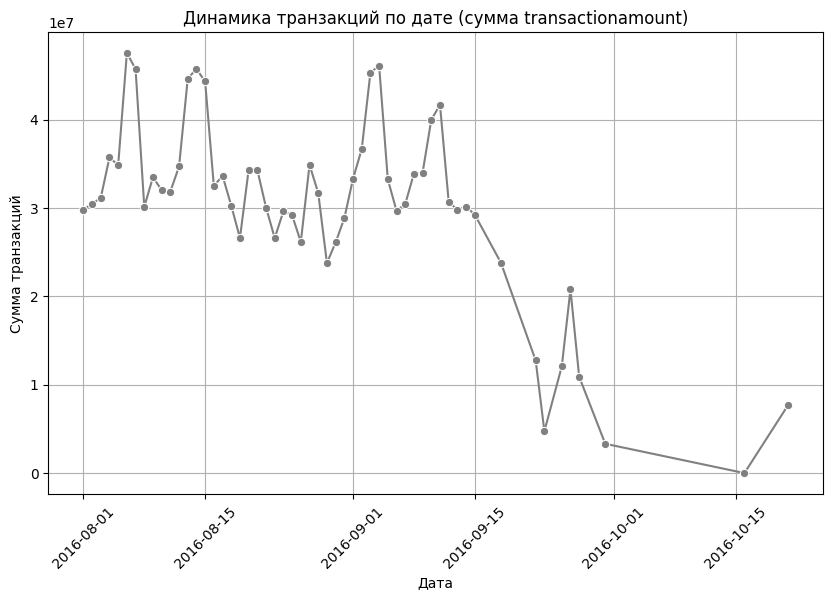

transactiondate
2016-08-01    29801816.34
2016-08-02    30467503.29
2016-08-03    31149483.67
2016-08-04    35722718.64
2016-08-05    34833933.12
2016-08-06    47527227.82
2016-08-07    45727772.63
2016-08-08    30129433.64
2016-08-09    33479570.48
2016-08-10    32016308.51
2016-08-11    31861317.88
2016-08-12    34693994.33
2016-08-13    44645472.34
2016-08-14    45732820.10
2016-08-15    44313092.06
2016-08-16    32475746.59
2016-08-17    33650376.18
2016-08-18    30265934.55
2016-08-19    26591483.45
2016-08-20    34317918.94
2016-08-21    34301751.22
2016-08-22    30051816.95
2016-08-23    26596737.44
2016-08-24    29648858.76
2016-08-25    29170857.91
2016-08-26    26156026.50
2016-08-27    34876843.03
2016-08-28    31692083.74
2016-08-29    23767589.04
2016-08-30    26100171.45
2016-08-31    28832833.24
2016-09-01    33305061.05
2016-09-02    36649840.64
2016-09-03    45312089.56
2016-09-04    46118447.52
2016-09-05    33230991.52
2016-09-06    29688559.95
2016-09-07    30440017

In [29]:
transaction_sum = df.groupby('transactiondate')['transactionamount(inr)'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_sum.index, y=transaction_sum.values, marker='o', color='grey')
plt.title('Динамика транзакций по дате (сумма transactionamount)')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(transaction_sum)

<ipython-input-22-1d2ced3a4d7e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_payment = df.groupby('age_group')['transactionamount(inr)'].sum()
<ipython-input-22-1d2ced3a4d7e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_payment.index, y=age_group_payment.values, palette='Greys')


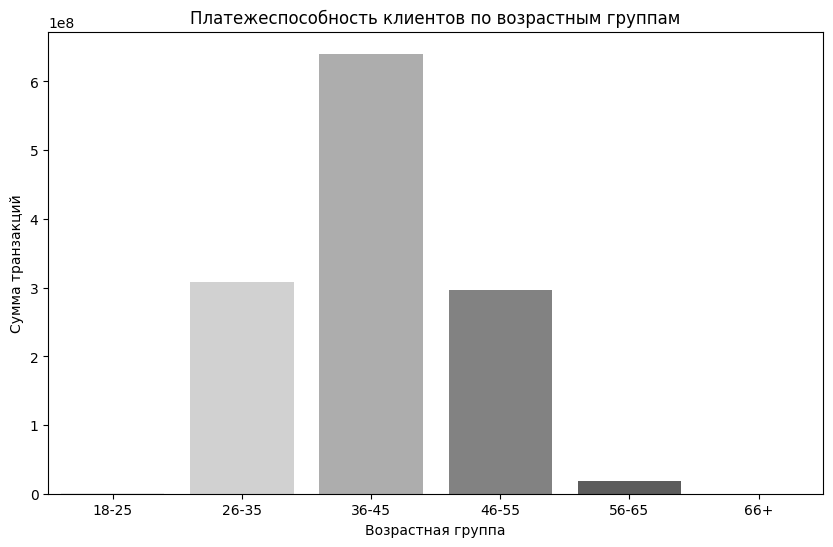

Самая платежеспособная группа: 36-45, Сумма транзакций: 640156743.61


In [22]:
from datetime import datetime
df['customerdob'] = pd.to_datetime(df['customerdob'])

current_date = pd.to_datetime('today')
df['age'] = (current_date - df['customerdob']).dt.days // 365

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_payment = df.groupby('age_group')['transactionamount(inr)'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_payment.index, y=age_group_payment.values, palette='Greys')
plt.title('Платежеспособность клиентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Сумма транзакций')
plt.show()

most_profitable_group = age_group_payment.idxmax()
most_profitable_amount = age_group_payment.max()

print(f"Самая платежеспособная группа: {most_profitable_group}, Сумма транзакций: {most_profitable_amount}")

Топ 10 локаций по количеству транзакций:
     custlocation  transaction_count  transaction_sum
5268       MUMBAI             103595     1.796861e+08
5792    NEW DELHI              84928     1.607059e+08
772     BANGALORE              81555     1.184248e+08
3083      GURGAON              73818     1.120947e+08
2075        DELHI              71019     1.062249e+08
5888        NOIDA              32784     4.446343e+07
1603      CHENNAI              30009     4.463782e+07
6719         PUNE              25851     3.959035e+07
3394    HYDERABAD              23049     3.617739e+07
8386        THANE              21505     2.715810e+07

Топ 10 локаций по сумме транзакций:
     custlocation  transaction_count  transaction_sum
5268       MUMBAI             103595     1.796861e+08
5792    NEW DELHI              84928     1.607059e+08
772     BANGALORE              81555     1.184248e+08
3083      GURGAON              73818     1.120947e+08
2075        DELHI              71019     1.062249e+08
4268

<ipython-input-31-bdfd83116f1d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_count', y='custlocation', data=top_locations_by_count, palette='Greys')


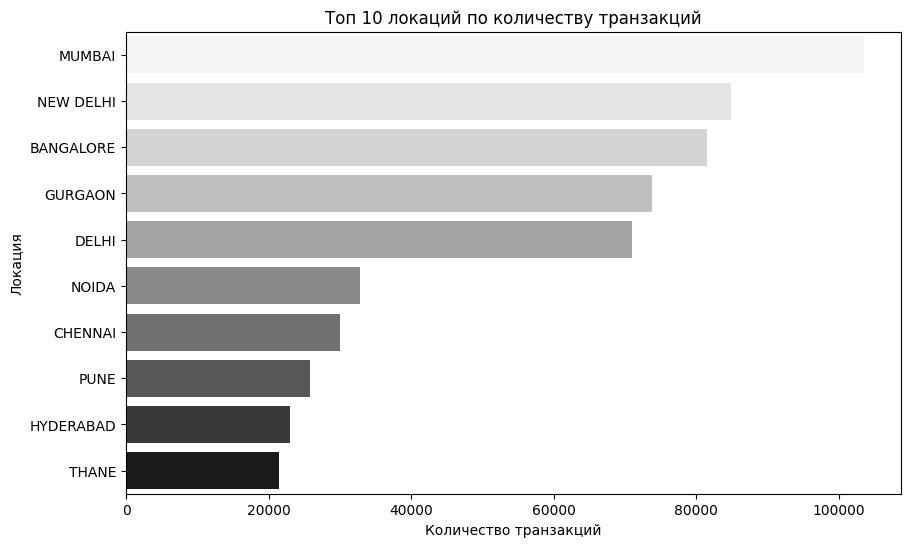

<ipython-input-31-bdfd83116f1d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_sum', y='custlocation', data=top_locations_by_sum, palette='Greys')


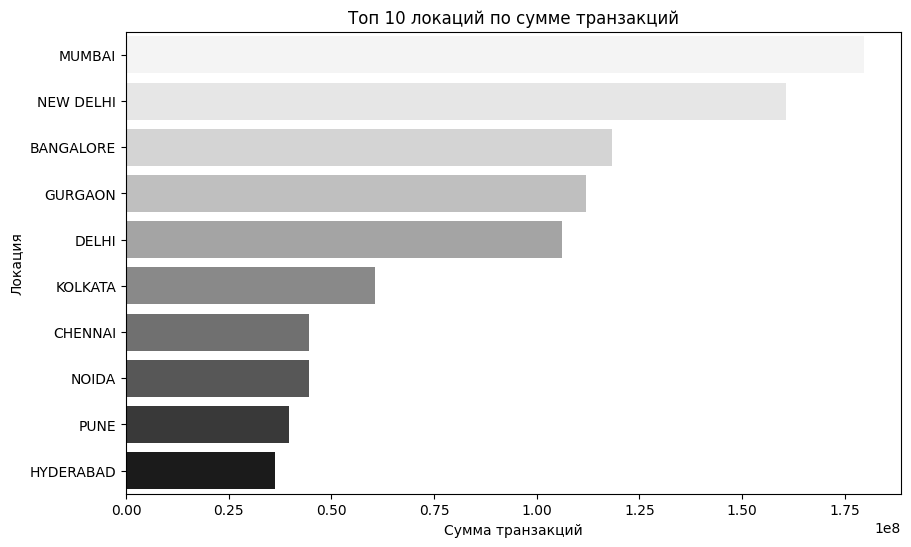

In [31]:
location_stats = df.groupby('custlocation').agg(
    transaction_count=('transactionid', 'count'),
    transaction_sum=('transactionamount(inr)', 'sum')
).reset_index()

top_locations_by_count = location_stats.sort_values(by='transaction_count', ascending=False).head(10)

top_locations_by_sum = location_stats.sort_values(by='transaction_sum', ascending=False).head(10)

print("Топ 10 локаций по количеству транзакций:")
print(top_locations_by_count)

print("\nТоп 10 локаций по сумме транзакций:")
print(top_locations_by_sum)

plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_count', y='custlocation', data=top_locations_by_count, palette='Greys')
plt.title('Топ 10 локаций по количеству транзакций')
plt.xlabel('Количество транзакций')
plt.ylabel('Локация')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_sum', y='custlocation', data=top_locations_by_sum, palette='Greys')
plt.title('Топ 10 локаций по сумме транзакций')
plt.xlabel('Сумма транзакций')
plt.ylabel('Локация')
plt.show()

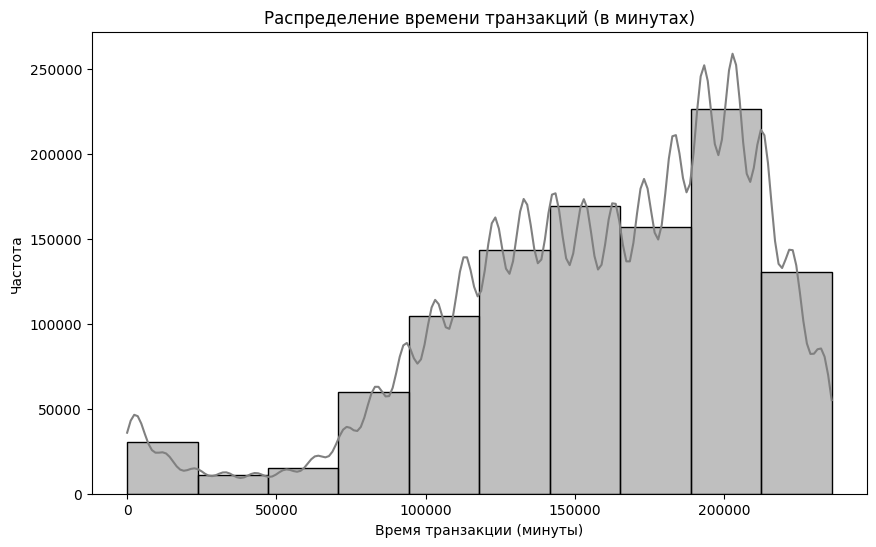

In [26]:
df['transactiontime_minutes'] = df['transactiontime']

plt.figure(figsize=(10, 6))
sns.histplot(df['transactiontime_minutes'], kde=True, color='grey', bins=10)
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Частота')
plt.show()


# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка